In [72]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
# from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [146]:
pd.set_option('display.max_columns', None)

ad_df=pd.read_csv("/home/nadiera/Downloads/dataset_imdb-advanced-scraper_2022-12-12_08-54-54-036.csv")
ad_df.head()

akas/0/text alternateVersions/0/text/plaidHtml  \
0          24 Giờ Hồi Sinh                                NaN   
1  The Cane Field Killings                                NaN   
2                   大力士-桑孫                                NaN   
3   Yo soy todas las niñas                                NaN   
4                      NaN                                NaN   

   canHaveEpisodes  canRate/isRatable  cast/0/attributes  \
0            False               True                NaN   
1             True               True                NaN   
2            False               True                NaN   
3            False               True                NaN   
4            False               True                NaN   

  cast/0/attributes/0/text cast/0/attributes/1/text  cast/0/characters  \
0                      NaN                      NaN                NaN   
1                      NaN                      NaN                NaN   
2                      NaN                      NaN                NaN   
3                      NaN                      NaN                NaN   
4                      NaN                      NaN                NaN   

  cast/0/characters/0/name cast/0/characters/1/name cast/0/characters/2/name  \
0            Travis Conrad                      NaN                      NaN   
1           Dr. Reyka Gama                      NaN                      NaN   
2                   Samson                      NaN                      NaN   
3             Jodie Snyman                      NaN                      NaN   
4       Jaci van Jaarsveld                      NaN                      NaN   

   cast/0/episodeCredits/total  cast/0/episodeCredits/yearRange  \
0                          0.0                              NaN   
1                          8.0                              NaN   
2                          0.0                              NaN   
3                          0.0                              NaN   
4                          0.0                              NaN   

   cast/0/episodeCredits/yearRange/endYear  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   cast/0/episodeCredits/yearRange/year cast/0/name/id  \
0                                   NaN      nm0000160   
1                                2021.0      nm0257188   
2                                   NaN      nm2837751   
3                                   NaN      nm2334393   
4                                   NaN      nm1936540   

  cast/0/name/nameText/text  cast/0/name/primaryImage  \
0               Ethan Hawke                       NaN   
1           Kim Engelbrecht                       NaN   
2              Taylor James                       NaN   
3             Erica Wessels                       NaN   
4            Anel Alexander                       NaN   

   cast/0/name/primaryImage/height  \
0                            400.0   
1                           3543.0   
2                           5760.0   
3                              NaN   
4                            864.0   

                        cast/0/name/primaryImage/url  \
0  https://m.media-amazon.com/images/M/MV5BMTk4ND...   
1  https://m.media-amazon.com/images/M/MV5BYjdjM2...   
2  https://m.media-amazon.com/images/M/MV5BODk3Y2...   
3                                                NaN   
4  https://m.media-amazon.com/images/M/MV5BYzkyYj...   

   cast/0/name/primaryImage/width  cast/1/attributes cast/1/attributes/0/text  \
0                           283.0                NaN               as Xu Qing   
1                          2362.0                NaN                      NaN   
2                          3840.0                NaN                      NaN   
3                             NaN                NaN                      N

In [97]:
df=pd.read_csv("/home/nadiera/Downloads/dataset_imdb-scraper_2022-12-10_10-38-47-151.csv")
df.shape

(10001, 14)

In [98]:
df.head()


certificate        country  \
0  Argentina:16, Australia:M, Brazil:16, Canada:T...  United States   
1  Argentina:16, Australia:MA15+, Austria:16, Bra...  United States   
2  Australia:M, Germany:12, India:UA, Indonesia:1...          India   
3  Argentina:7, Australia:PG, Brazil:Livre, Canad...  United States   
4  Argentina:13, Australia:M, Canada:14A, Canada:...  United States   

                                         description  \
0  Prodigal daughter Tumi goes home for the holid...   
1  Violence ensues after an extraterrestrial race...   
2  Mr. A, a fearless thief, steals valuable artif...   
3  Fearless seal Quinn assembles a squad of misfi...   
4  A teenager is left invisible to the living aft...   

                       director                      genre  isEpisode  \
0                           NaN              Comedy, Drama      False   
1                Neill Blomkamp   Action, Sci-Fi, Thriller      False   
2                 Sanjay Gadhvi    Action, Crime, Thriller      False   
3  Greig Cameron, Kane Croudace  Animation, Action, Comedy      False   
4                David S. Goyer      Crime, Drama, Fantasy      False   

  original title  rating  ratingcount  runtime  \
0            NaN     6.3        519.0     50.0   
1            NaN     7.9     682934.0    112.0   
2        Dhoom:2     6.5      27314.0    152.0   
3            NaN     5.6       1496.0    101.0   
4            NaN     6.1      35782.0    102.0   

                                               stars  \
0        Saint Seseli, Nandi Nyembe, Busisiwe Lurayi   
1            Sharlto Copley, David James, Jason Cope   
2  Hrithik Roshan, Abhishek Bachchan, Aishwarya R...   
3       J.K. Simmons, Dolph Lundgren, Sharlto Copley   
4  Justin Chatwin, Margarita Levieva, Marcia Gay ...   

                          title                                     url  \
0  How to Ruin Christmas (2020)  https://www.imdb.com/title/tt13492362/   
1             District 9 (2009)   https://www.imdb.com/title/tt1136608/   
2                Dhoom 2 (2006)   https://www.imdb.com/title/tt0441048/   
3              Seal Team (2021)   https://www.imdb.com/title/tt8456190/   
4          The Invisible (2007)   https://www.imdb.com/title/tt0435670/   

     year  
0  2020.0  
1  2009.0  
2  2006.0  
3  2021.0  
4  2007.0

In [ ]:
email_merge = df1.merge(df2, on=["email"], suffixes=("", "_right"))
mobile_merge = df1.merge(df2, left_on=["phone"], right_on=["Mobile"], suffixes=("", "_right"))
landline_merge = df1.merge(df2, left_on=["phone"], right_on=["LandLine"], suffixes=("", "_right"))

In [99]:
df.isnull().sum()

certificate       8707
country            236
description       5683
director          2824
genre              491
isEpisode            0
original title    9901
rating            8091
ratingcount       8091
runtime           2638
stars             2450
title                0
url                  0
year              2353
dtype: int64

In [100]:
# R = df['rating']
# v = df['ratingcount']
# # We will only consider movies that have more votes than at least 80% of the movies in our dataset
# m = df['ratingcount'].quantile(0.8)
# C = df['rating'].mean()

# df['weighted_average'] = (R*v + C*m)/(v+m)



In [101]:
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df[['popularity', 'weighted_average']])
# weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

# weighted_df.index = df['original_title']

In [102]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nadiera/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

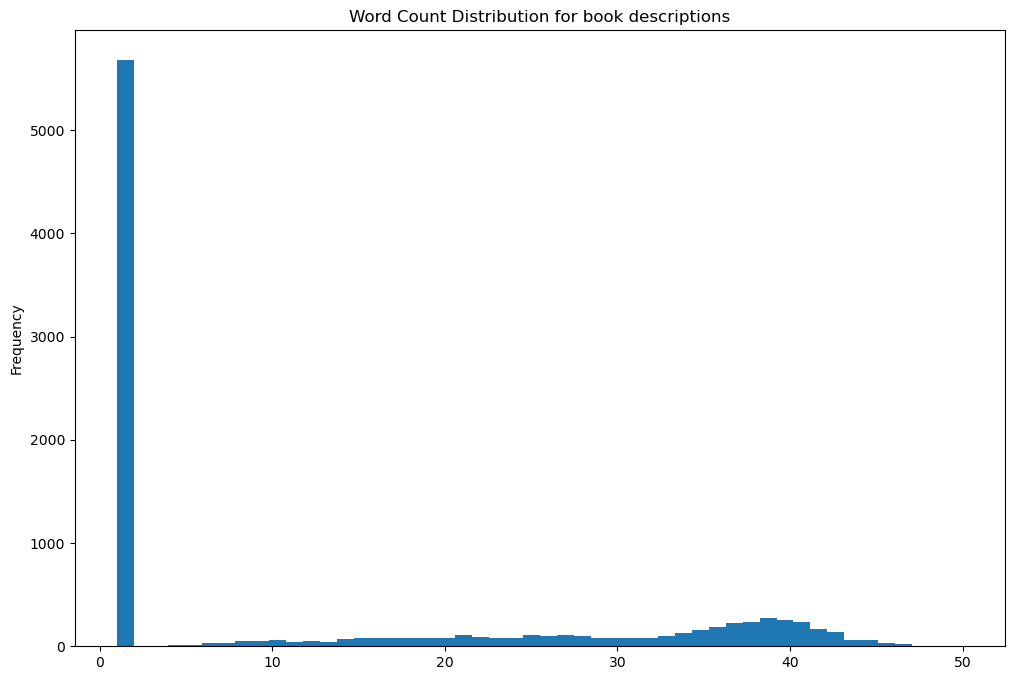

In [103]:
# Calculating the word count for book description
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for comments'}>

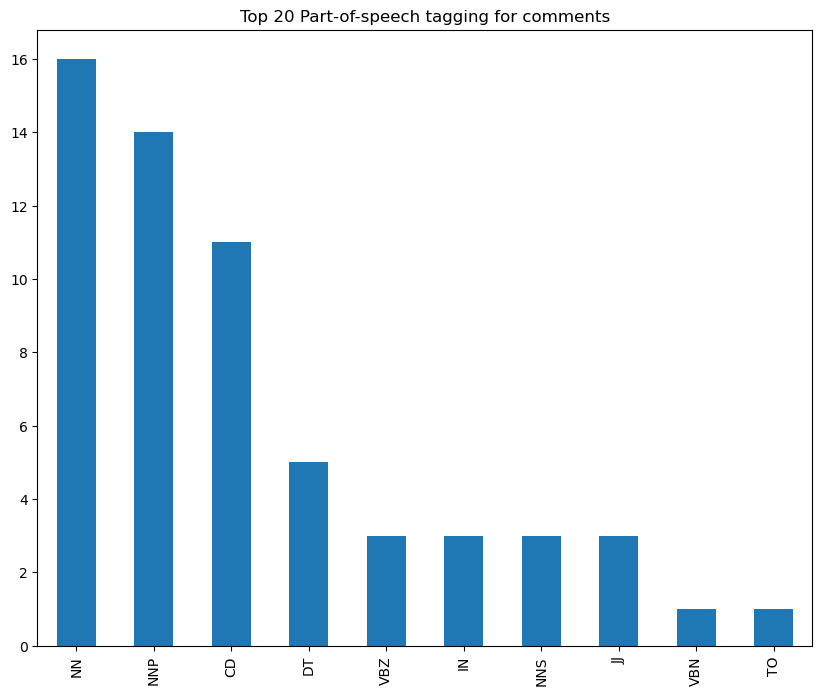

In [104]:
from textblob import TextBlob
blob = TextBlob(str(df['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")


In [105]:
df.head()

certificate        country  \
0  Argentina:16, Australia:M, Brazil:16, Canada:T...  United States   
1  Argentina:16, Australia:MA15+, Austria:16, Bra...  United States   
2  Australia:M, Germany:12, India:UA, Indonesia:1...          India   
3  Argentina:7, Australia:PG, Brazil:Livre, Canad...  United States   
4  Argentina:13, Australia:M, Canada:14A, Canada:...  United States   

                                         description  \
0  Prodigal daughter Tumi goes home for the holid...   
1  Violence ensues after an extraterrestrial race...   
2  Mr. A, a fearless thief, steals valuable artif...   
3  Fearless seal Quinn assembles a squad of misfi...   
4  A teenager is left invisible to the living aft...   

                       director                      genre  isEpisode  \
0                           NaN              Comedy, Drama      False   
1                Neill Blomkamp   Action, Sci-Fi, Thriller      False   
2                 Sanjay Gadhvi    Action, Crime, Thriller      False   
3  Greig Cameron, Kane Croudace  Animation, Action, Comedy      False   
4                David S. Goyer      Crime, Drama, Fantasy      False   

  original title  rating  ratingcount  runtime  \
0            NaN     6.3        519.0     50.0   
1            NaN     7.9     682934.0    112.0   
2        Dhoom:2     6.5      27314.0    152.0   
3            NaN     5.6       1496.0    101.0   
4            NaN     6.1      35782.0    102.0   

                                               stars  \
0        Saint Seseli, Nandi Nyembe, Busisiwe Lurayi   
1            Sharlto Copley, David James, Jason Cope   
2  Hrithik Roshan, Abhishek Bachchan, Aishwarya R...   
3       J.K. Simmons, Dolph Lundgren, Sharlto Copley   
4  Justin Chatwin, Margarita Levieva, Marcia Gay ...   

                          title                                     url  \
0  How to Ruin Christmas (2020)  https://www.imdb.com/title/tt13492362/   
1             District 9 (2009)   https://www.imdb.com/title/tt1136608/   
2                Dhoom 2 (2006)   https://www.imdb.com/title/tt0441048/   
3              Seal Team (2021)   https://www.imdb.com/title/tt8456190/   
4          The Invisible (2007)   https://www.imdb.com/title/tt0435670/   

     year  word_count  
0  2020.0          26  
1  2009.0          26  
2  2006.0          35  
3  2021.0          23  
4  2007.0          11

In [106]:
df.isnull().sum()


certificate       8707
country            236
description       5683
director          2824
genre              491
isEpisode            0
original title    9901
rating            8091
ratingcount       8091
runtime           2638
stars             2450
title                0
url                  0
year              2353
word_count           0
dtype: int64

In [107]:
C= df['rating'].mean()
C

6.627486910994767

In [115]:
m= df['ratingcount'].quantile(0.9)
m

1195.200000000003

In [116]:
# q_movies = df.copy().loc[df['ratingcount'] >= m]
# q_movies.shape

In [117]:
def weighted_rating(x, m=m, C=C):
    v = x['ratingcount']
    R = x['rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [118]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
df['score'] = df.apply(weighted_rating, axis=1)

In [119]:
#Sort movies based on score calculated above
df = df.sort_values('score', ascending=False)

#Print the top 15 movies
df[['title', 'ratingcount', 'rating', 'score']].head(10)

title  ratingcount  rating  \
19                                     Samsara (2011)      36286.0     8.4   
44                                 Black Sails (2014)     105490.0     8.2   
32                                Hotel Rwanda (2004)     356492.0     8.1   
35                                      Gandhi (1982)     232500.0     8.1   
21                          My Octopus Teacher (2020)      55242.0     8.1   
1                                   District 9 (2009)     682934.0     7.9   
183                           Beautiful People (1974)       3926.0     8.2   
53          The No. 1 Ladies' Detective Agency (2008)       3573.0     8.2   
38                                    The Fall (2006)     112980.0     7.8   
271  Brothers in Blood: The Lions of Sabi Sand (2015)        903.0     8.5   

        score  
19   8.343478  
44   8.182383  
32   8.095080  
35   8.092469  
21   8.068816  
1    7.897777  
183  7.833002  
53   7.805833  
38   7.787726  
271  7.433358

In [120]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10001, 15120)

In [121]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [122]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [123]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [127]:
get_recommendations('How to Ruin Christmas (2020)')


6449                             Beyond the Flames (2017)
1056                             A Moment of Youth (2011)
2144                                  Food Fighter (2018)
510     Atlantis: End of a World, Birth of a Legend (2...
4641                    Anyway We Won in Nicaragua (1989)
2254                                    Changing the Game
2930                              11Eleven Project (2012)
2280                                          Pure (2009)
6323                                    Printerman (2012)
3319                                       Abandon (2014)
Name: title, dtype: object

In [128]:
df.head()

certificate        country  \
19  Australia:PG, Canada:PG, Canada:G, Denmark:7, ...        Germany   
44  Argentina:16, Australia:R18+, Australia:MA15+,...  United States   
32  Argentina:13, Australia:M, Brazil:14, Canada:1...  United States   
35  Argentina:14, Argentina:Atp, Australia:NRC, Au...  United States   
21  Argentina:7, Australia:G, Brazil:Livre, Canada...  United States   

                                          description  \
19  Filmed over nearly five years in twenty-five c...   
44  Follows Captain Flint and his pirates twenty y...   
32  Paul Rusesabagina, a hotel manager, houses ove...   
35  The life of the lawyer who became the famed le...   
21  A filmmaker forges an unusual friendship with ...   

                     director                      genre  isEpisode  \
19                 Ron Fricke         Documentary, Music      False   
44                        NaN   Action, Adventure, Drama      False   
32               Terry George  Biography, Drama, History      False   
35       Richard Attenborough  Biography, Drama, History      False   
21  Pippa Ehrlich, James Reed                Documentary      False   

   original title  rating  ratingcount  runtime  \
19            NaN     8.4      36286.0    102.0   
44            NaN     8.2     105490.0     56.0   
32            NaN     8.1     356492.0    121.0   
35            NaN     8.1     232500.0    191.0   
21            NaN     8.1      55242.0     85.0   

                                                stars  \
19  Balinese Tari Legong Dancers, Ni Made Megahadi...   
44  Jessica Parker Kennedy, Toby Stephens, Hannah New   
32       Don Cheadle, Sophie Okonedo, Joaquin Phoenix   
35      Ben Kingsley, John Gielgud, Rohini Hattangadi   
21                           Craig Foster, Tom Foster   

                        title                                     url    year  \
19             Samsara (2011)   https://www.imdb.com/title/tt0770802/  2011.0   
44         Black Sails (2014)   https://www.imdb.com/title/tt2375692/  2014.0   
32        Hotel Rwanda (2004)   https://www.imdb.com/title/tt0395169/  2004.0   
35              Gandhi (1982)   https://www.imdb.com/title/tt0083987/  1982.0   
21  My Octopus Teacher (2020)  https://www.imdb.com/title/tt12888462/  2020.0   

    word_count     score  
19          33  8.343478  
44          17  8.182383  
32          21  8.095080  
35          24  8.092469  
21          26  8.068816

In [135]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [136]:
# Apply clean_data function to your features.
features = ['description', 'director', 'genre', 'stars']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [137]:
def create_soup(x):
    return ' '.join(x['description']) + ' ' + ' '.join(x['director']) + ' ' + x['genre'] + ' ' + ' '.join(x['stars'])
df['soup'] = df.apply(create_soup, axis=1)

In [138]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [139]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [140]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [141]:
get_recommendations('My Octopus Teacher (2020)', cosine_sim2)

13      Please Vote for Me (2007)
20         Chasing the Sun (2020)
29                  Alison (2016)
39              Snake City (2014)
40    On the Way to School (2013)
46          The Magic Pill (2017)
48    Escape to Chimp Eden (2008)
49                  Trophy (2017)
57       Into the Okavango (2018)
68              Devilsdorp (2021)
Name: title, dtype: object

In [163]:
get_recommendations('Semi-Soet (2012)')

5622                                    Lungelo (2016)
3237                                  Longsince (2022)
3230                                    The Tie (2020)
555     Tropical Heat - May Divorce Be with You (1993)
763                                    Triptiek (1994)
1292                                      Model (2020)
1880                     House on Willow Street (2016)
978                                 City Lovers (1982)
414            The Good, the Old and the Greedy (2021)
6584                               Bitter Sweet (2016)
Name: title, dtype: object

In [194]:
df.title[600]

'Binnelanders (2005)'

In [164]:
get_recommendations('Spud (2010)')

3452                            Painting Cape Town (2014)
1686                 Spud 2: The Madness Continues (2013)
455                                 Plot for Peace (2013)
4867                 Robben Island: Our University (1988)
238                        The Girl from St. Agnes (2019)
1010                      1994: The Bloody Miracle (2014)
1729                       Spud 3: Learning to Fly (2014)
1676                               Silverton Siege (2022)
4531                                Skewe Reënboog (2015)
6410    Counting Headz: South Afrika's Sistaz in Hip H...
Name: title, dtype: object

In [180]:
get_recommendations('Egoli: Place of Gold - Episode #1.1226')

1                                   Black Sails (2014)
2                                  Hotel Rwanda (2004)
3                                        Gandhi (1982)
4                            My Octopus Teacher (2020)
5                                    District 9 (2009)
6                              Beautiful People (1974)
7            The No. 1 Ladies' Detective Agency (2008)
8                                      The Fall (2006)
9     Brothers in Blood: The Lions of Sabi Sand (2015)
10                                   Shaka Zulu (1986)
Name: title, dtype: object

In [ ]:
get_recommendations('Spud (2010)')

In [170]:
get_recommendations('Die Vierde Kabinet (1998)')

6606               ANC Reportback (I) (1989)
4754                  Chobe Elephants (1989)
617                      An Epic Tale (2012)
6475                      Caroline II (1989)
3004                          Die SMS (2020)
687                          Safe Bet (2015)
4300    Carolline: Jenny Se Nuwe Baba (1989)
413                    Let's Be Frank (2016)
5156                  Gevaarlike Spel (1962)
5764                          Bergies (1989)
Name: title, dtype: object

In [195]:
get_recommendations('Binnelanders (2005)')

3850                         Zero to Zero (2021)
332                            Little One (2013)
1743                         Killer Force (1976)
1595                    The Shadowed Mind (1988)
5138                           Furryland. (2018)
3391             Netnou Hoor die Kinders! (1977)
3452                   Painting Cape Town (2014)
1759                          Night Drive (2010)
3029    Tarzana Comic Con & Film Festival (2022)
3193                       The First Time (2012)
Name: title, dtype: object